In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMClassifier

from pyts.classification import TimeSeriesForest, TSBF

from modules.categorical_data_coding import code_data
from modules.model_runer import run_model
from modules.classes_scatterplot import draw_classes_scatterplot

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('./prepared_datasets/100_Que_classification.csv')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.975315,30.319231,30.670246,30.899062,30.761777,30.761792,29.281708,28.701923,30.578738,31.250154,...,18.265300,18.982415,18.677331,18.616246,18.478962,18.768877,18.662092,18.952008,19.013123,0Ca/100Que
1,19.119938,19.425054,19.516669,18.601185,17.990800,18.616415,18.555431,18.173946,18.891162,18.936977,...,31.434223,32.242938,33.250054,32.883869,33.372185,33.158600,32.792315,33.295931,33.616346,0Ca/100Que
2,33.158662,32.487277,31.861692,31.785408,31.648023,32.670438,33.906354,34.577769,33.708085,32.517900,...,31.816346,32.533562,32.365677,31.450192,31.389108,31.526523,31.724838,31.602854,32.152169,0Ca/100Que
3,31.419785,31.084100,32.243715,33.342431,32.976246,31.984362,31.358777,31.663992,27.376308,25.667323,...,28.246369,26.827385,23.150000,24.691115,27.666631,28.002346,24.447062,20.083077,18.984492,0Ca/100Que
4,18.633508,17.962123,18.435138,18.847154,18.770869,19.716985,20.785100,20.632515,19.579631,18.786246,...,31.069892,31.344608,31.970223,32.260138,31.695554,31.192069,31.665085,30.871700,29.132215,0Ca/100Que


In [4]:
df.target.unique()

array(['0Ca/100Que', '10Ca/100Que', '100Ca/100Que'], dtype=object)

In [5]:
code_data(df, 'target')
df.head()

,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,...,f_4991,f_4992,f_4993,f_4994,f_4995,f_4996,f_4997,f_4998,f_4999,target
0,30.975315,30.319231,30.670246,30.899062,30.761777,30.761792,29.281708,28.701923,30.578738,31.250154,...,18.265300,18.982415,18.677331,18.616246,18.478962,18.768877,18.662092,18.952008,19.013123,0
1,19.119938,19.425054,19.516669,18.601185,17.990800,18.616415,18.555431,18.173946,18.891162,18.936977,...,31.434223,32.242938,33.250054,32.883869,33.372185,33.158600,32.792315,33.295931,33.616346,0
2,33.158662,32.487277,31.861692,31.785408,31.648023,32.670438,33.906354,34.577769,33.708085,32.517900,...,31.816346,32.533562,32.365677,31.450192,31.389108,31.526523,31.724838,31.602854,32.152169,0
3,31.419785,31.084100,32.243715,33.342431,32.976246,31.984362,31.358777,31.663992,27.376308,25.667323,...,28.246369,26.827385,23.150000,24.691115,27.666631,28.002346,24.447062,20.083077,18.984492,0
4,18.633508,17.962123,18.435138,18.847154,18.770869,19.716985,20.785100,20.632515,19.579631,18.786246,...,31.069892,31.344608,31.970223,32.260138,31.695554,31.192069,31.665085,30.871700,29.132215,0


# Tree based algorithms

In [6]:
X, y = np.array(df.drop('target', axis=1)), np.array(df['target'])

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Decision Tree

In [8]:
dtc = DecisionTreeClassifier(max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.5823389  0.66985646 0.64114833 0.63636364]
 CV Mean score: 0.6324268308001507


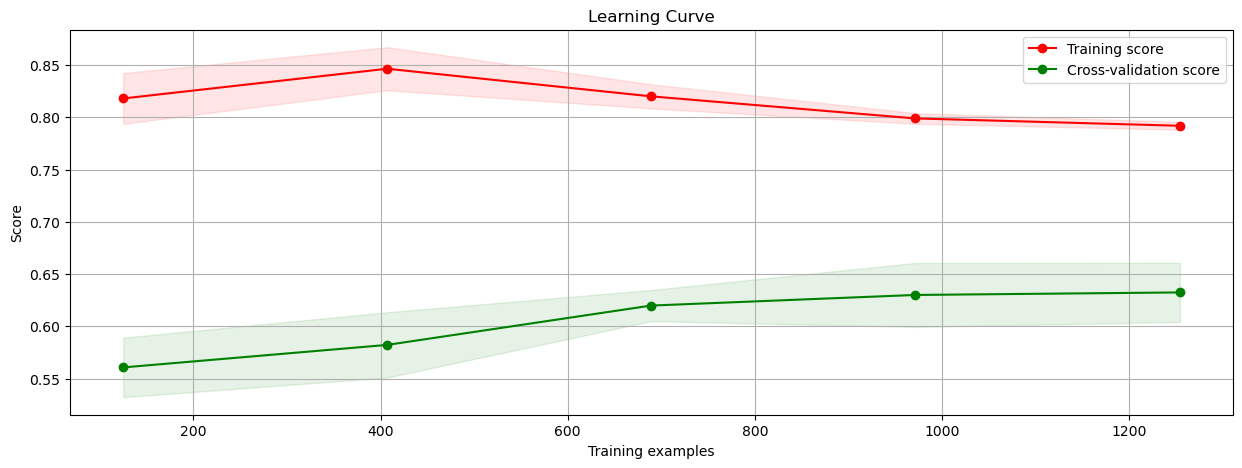

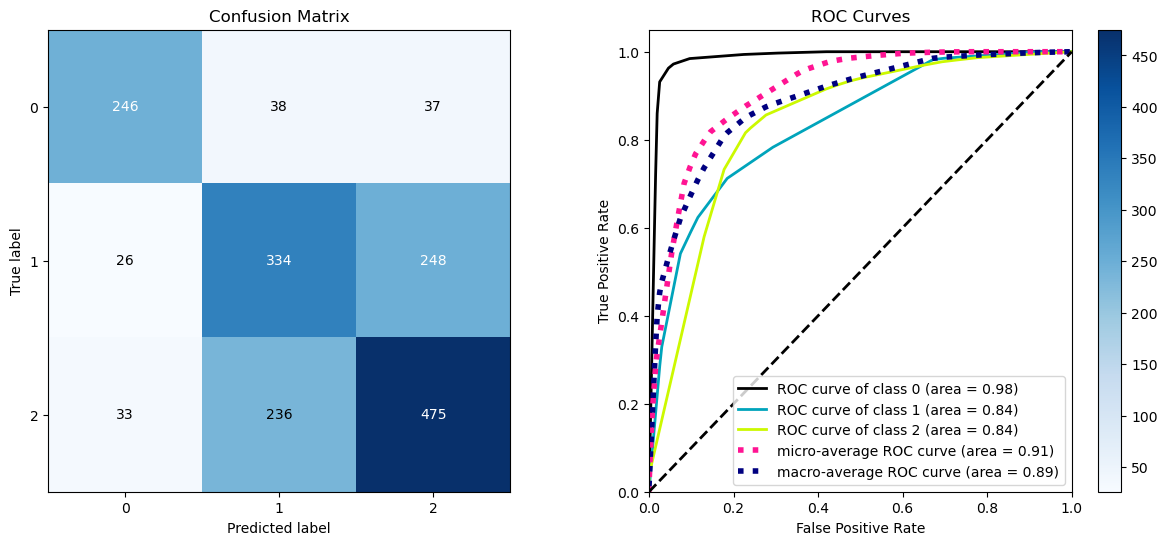

In [9]:
run_model(dtc, X_train, y_train)

In [10]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15)

In [11]:
dtc_pred = dtc.predict(X_test)

In [12]:
f1_score(y_test, dtc_pred, average='weighted')

0.6039378623322175

In [13]:
accuracy_score(y_test, dtc_pred)

0.6062052505966588

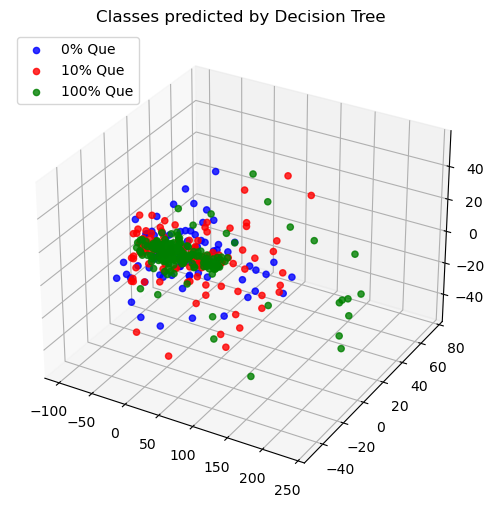

In [14]:
draw_classes_scatterplot(X_test, dtc_pred, "Classes predicted by Decision Tree",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Random Forest Classifer

In [15]:
rfc = RandomForestClassifier(n_estimators=35, max_depth=10, 
                             max_leaf_nodes=15, min_samples_leaf=15)

 CV Scores: [0.73747017 0.73684211 0.73684211 0.72966507]
 CV Mean score: 0.7352048623402724


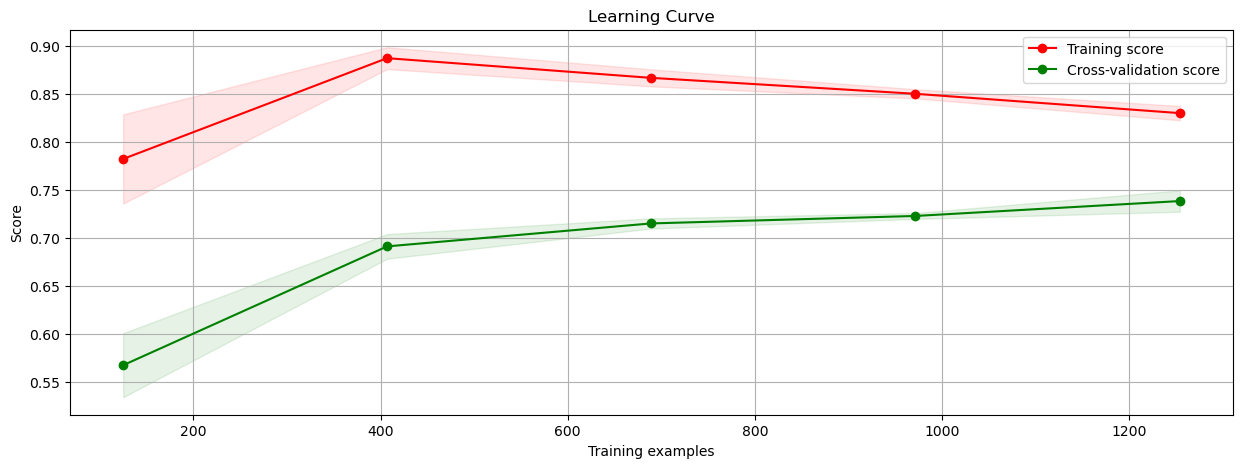

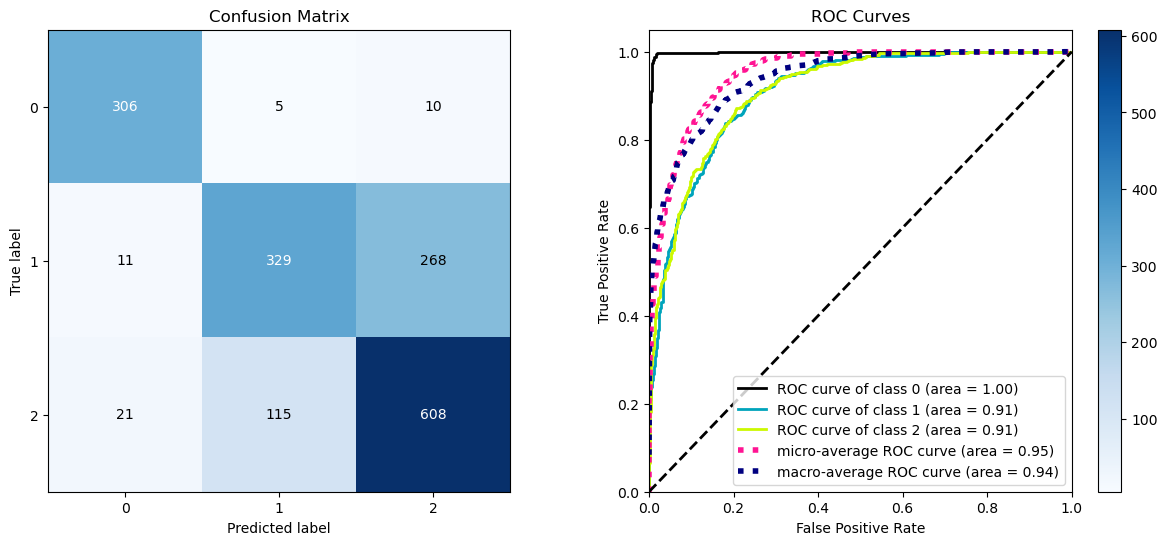

In [16]:
run_model(rfc, X_train, y_train)

In [17]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, max_leaf_nodes=15, min_samples_leaf=15,
                       n_estimators=35)

In [18]:
rfc_pred = rfc.predict(X_test)

In [19]:
f1_score(y_test, rfc_pred, average='weighted')

0.7357203086890983

In [20]:
accuracy_score(y_test, rfc_pred)

0.7422434367541766

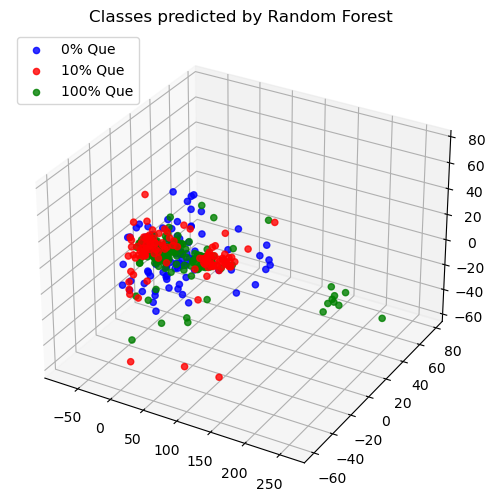

In [21]:
draw_classes_scatterplot(X_test, rfc_pred, "Classes predicted by Random Forest",
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Light GBM Classifier

In [22]:
lgbm = LGBMClassifier(n_estimators=15, max_depth=3, min_child_samples=10)

 CV Scores: [0.71121718 0.72966507 0.70813397 0.66985646]
 CV Mean score: 0.7047181715408068


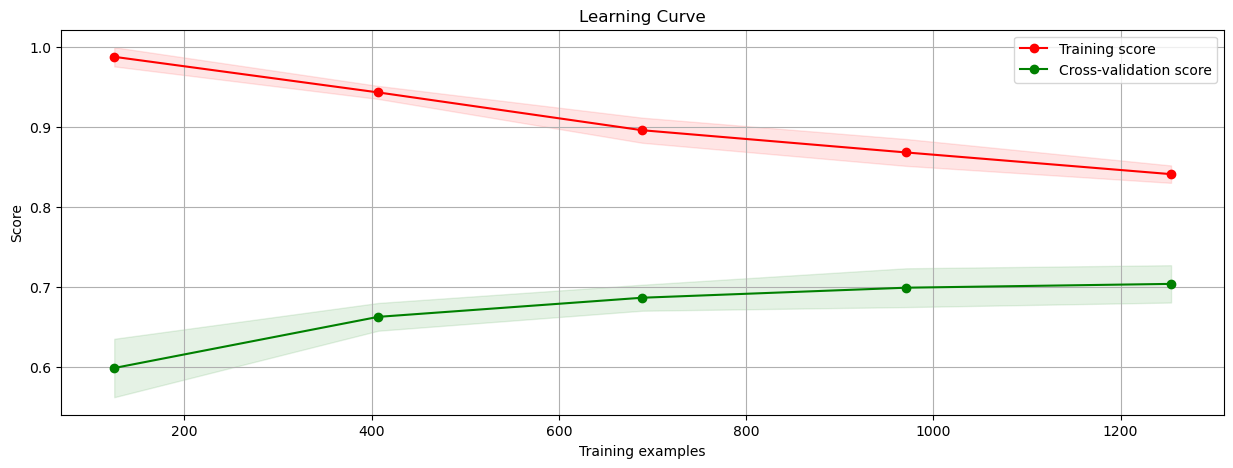

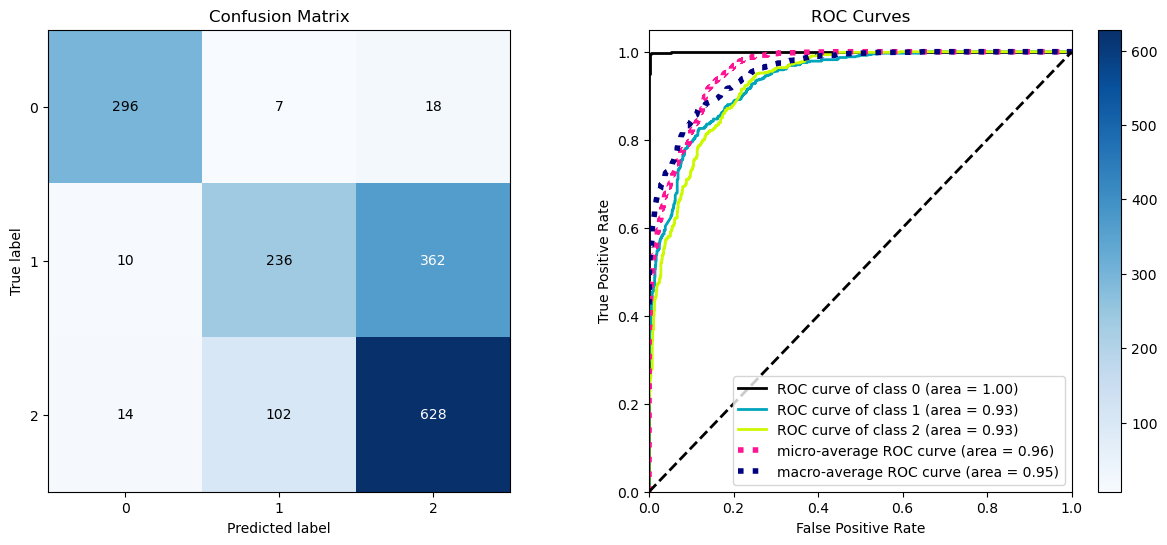

In [23]:
run_model(lgbm, X_train, y_train)

In [24]:
lgbm.fit(X_train, y_train)

LGBMClassifier(max_depth=3, min_child_samples=10, n_estimators=15)

In [25]:
lgbm_pred = lgbm.predict(X_test)

In [26]:
f1_score(y_test, lgbm_pred, average='weighted')

0.6570400520759716

In [27]:
accuracy_score(y_test, lgbm_pred)

0.6801909307875895

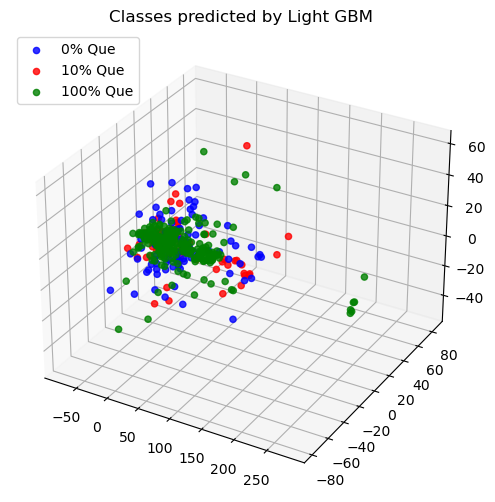

In [28]:
draw_classes_scatterplot(X_test, lgbm_pred, "Classes predicted by Light GBM", 
                        ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## Time Series Forest Classifier

In [29]:
tsf = TimeSeriesForest(n_estimators=18, max_depth=6, min_samples_leaf=10)

 CV Scores: [0.72553699 0.78947368 0.77511962 0.77990431]
 CV Mean score: 0.7675086501238995


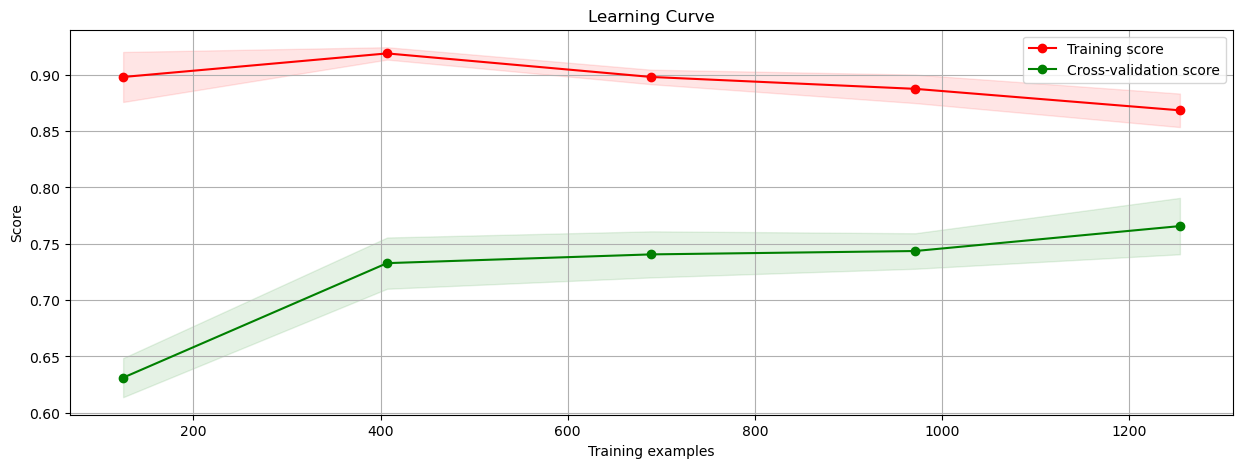

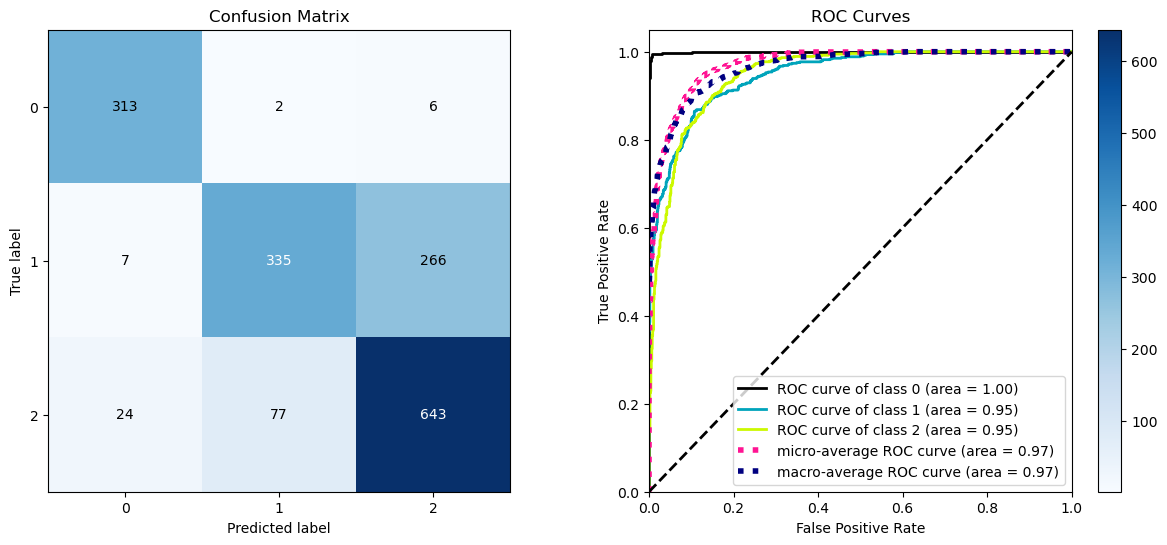

In [30]:
run_model(tsf, X_train, y_train)

In [31]:
tsf.fit(X_train, y_train)

TimeSeriesForest(max_depth=6, min_samples_leaf=10, n_estimators=18)

In [32]:
tsf_pred = tsf.predict(X_test)

In [33]:
f1_score(y_test, tsf_pred, average='weighted')

0.7577118801611946

In [34]:
accuracy_score(y_test, tsf_pred)

0.7637231503579952

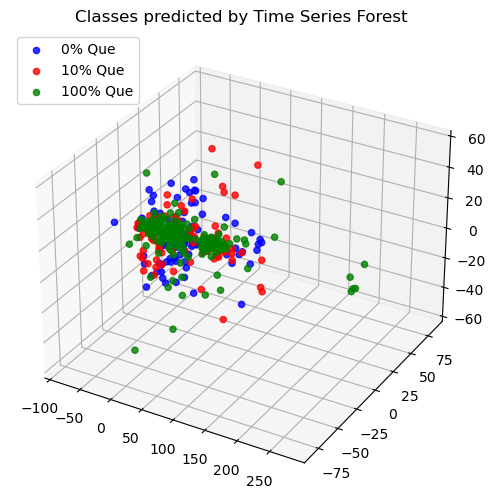

In [35]:
draw_classes_scatterplot(X_test, tsf_pred, "Classes predicted by Time Series Forest", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])

## TSBF

In [36]:
tsbf = TSBF(n_estimators=50, max_leaf_nodes=15, max_depth=8, min_samples_leaf=10)

 CV Scores: [0.71837709 0.784689   0.74162679 0.76555024]
 CV Mean score: 0.7525607792534058


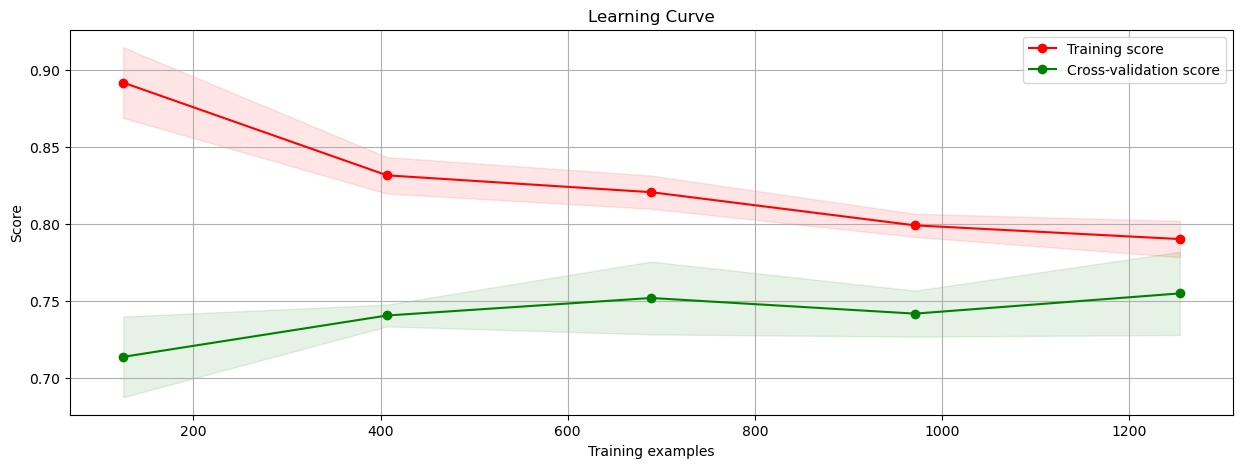

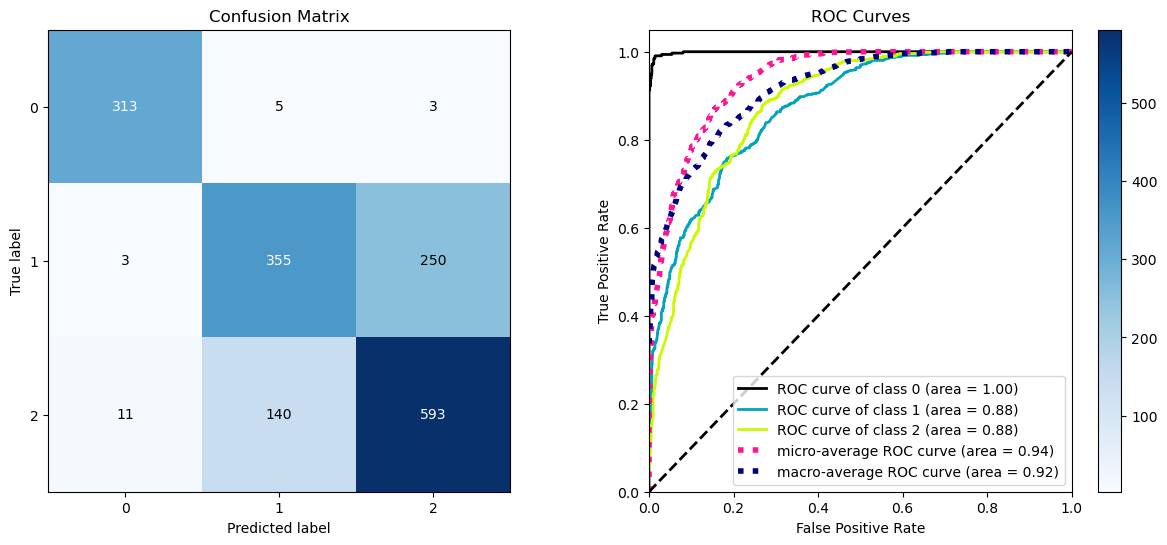

In [37]:
run_model(tsbf, X_train, y_train)

In [38]:
tsbf.fit(X_train, y_train)

TSBF(max_depth=8, max_leaf_nodes=15, min_samples_leaf=10, n_estimators=50)

In [39]:
tsbf_pred = tsbf.predict(X_test)

In [40]:
f1_score(y_test, tsbf_pred, average='weighted')

0.7496898439127236

In [41]:
accuracy_score(y_test, tsbf_pred)

0.7517899761336515

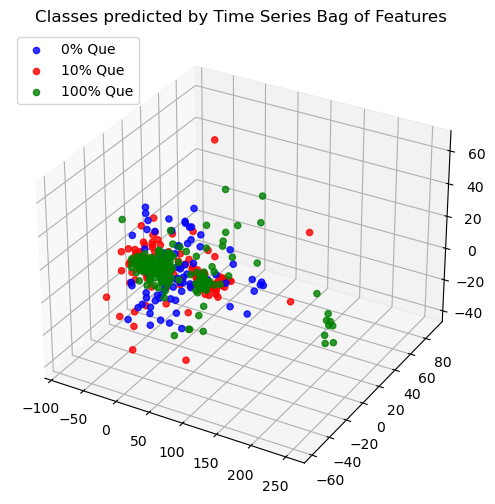

In [42]:
draw_classes_scatterplot(X_test, tsbf_pred, "Classes predicted by Time Series Bag of Features", 
                         ["0% Que", "10% Que", "100% Que"], ["blue", "red", "green"])